In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools as it
import olim
import matplotlib.pyplot as plt
import meshio
import numpy as np
import pyvista as pv

In [3]:
mesh = meshio.read('sphere3.vtk')

In [39]:
grid = pv.read('sphere3.vtk')

Get point array and tetrahedron index array from mesh object

In [4]:
points = mesh.points.astype(np.float64)
print('|points| = %d' % (points.shape[0],))

tetra = mesh.cells['tetra'].astype(np.int64)
print('|tetra| = %d' % (tetra.shape[0],))

|points| = 2102
|tetra| = 9891


Initialize slowness field

In [5]:
S = lambda x: 1 + np.dot(x, [0.2, -0.3, 0.1])
slowness = S(points)

Initialize adaptive Gauss-Seidel solver

In [6]:
tol = np.finfo(np.float64).resolution
solver = olim.EikonalAdaptiveGaussSeidel(points, tetra, slowness, tol)

Let $i_0$ be the index of the point nearest to the origin

In [7]:
i0 = np.argmin(np.sum(points**2, axis=1))
print('|points[i0]| = %g' % np.linalg.norm(points[i0]))

|points[i0]| = 5.22823e-15


Add point source at $i_0$

In [8]:
solver.add_boundary_point(i0, 0.0)
solver.commit()

Step solver and plot

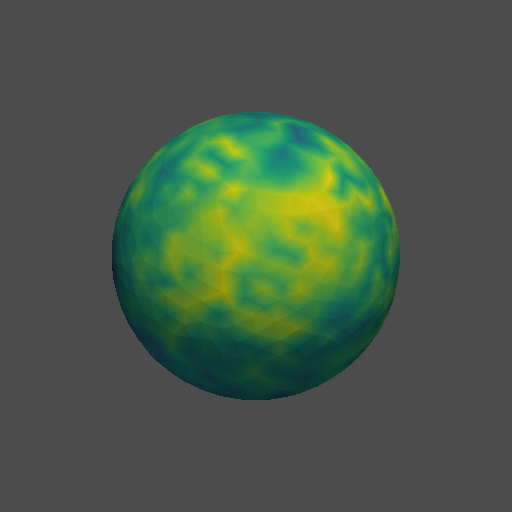

In [328]:
for _ in range(500):
    solver.step()

tetra_ind = np.where(np.all(np.isfinite(solver.values[tetra]), axis=1))[0]
vert_ind = np.unique(tetra[tetra_ind].flatten())
values = solver.values[vert_ind]

subgrid = grid.extract_cells(tetra_ind)

plotter = pv.Plotter()
plotter.add_mesh(subgrid, scalars=values, lighting=True, show_edges=False)
plotter.view_xz()
plotter.show(window_size=(512, 512))

In [ ]:
plotter = pv.Plotter()
plotter.open_movie('test.mp4')